In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats1
import scipy.stats as stats2
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('new_CSVs/travel_bfill.csv')
data.head()

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,...,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,...,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,...,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,...,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,4,200004,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,...,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
data.describe()

,Unnamed: 0,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000,4888.000000
mean,2443.500000,202443.500000,0.188216,37.665712,1.654255,15.458674,2.905074,3.708265,3.579583,3.244476,0.290917,3.078151,0.620295,1.190671,23550.158552
std,1411.188388,1411.188388,0.390925,9.306963,0.916583,8.490123,0.724891,1.000919,0.797613,1.842191,0.454232,1.365792,0.485363,0.858794,5368.993928
min,0.000000,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,1221.750000,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20238.000000
50%,2443.500000,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22257.500000
75%,3665.250000,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25563.500000
max,4887.000000,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# seeing which columns need outliers to be handled:

<AxesSubplot:xlabel='MonthlyIncome'>

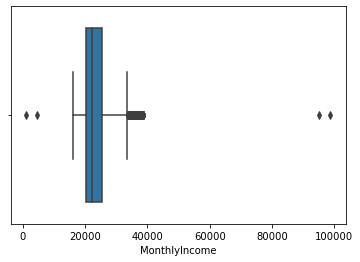

In [4]:
sns.boxplot(data['MonthlyIncome'])

<AxesSubplot:xlabel='DurationOfPitch'>

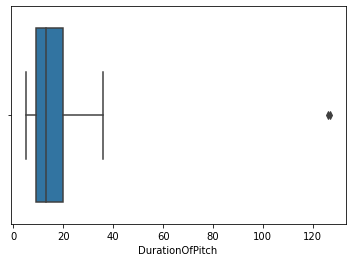

In [5]:
sns.boxplot(data['DurationOfPitch'])

<AxesSubplot:xlabel='NumberOfFollowups'>

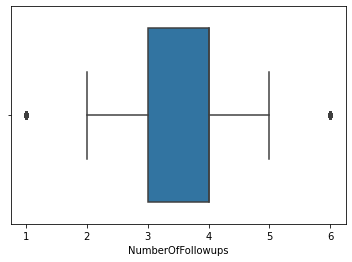

In [6]:
sns.boxplot(data['NumberOfFollowups'])

<AxesSubplot:xlabel='NumberOfPersonVisiting'>

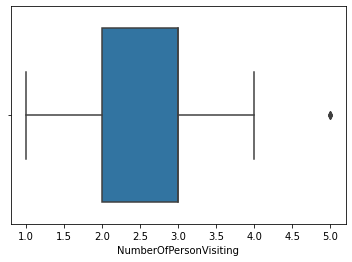

In [7]:
sns.boxplot(data['NumberOfPersonVisiting'])

<AxesSubplot:xlabel='NumberOfTrips'>

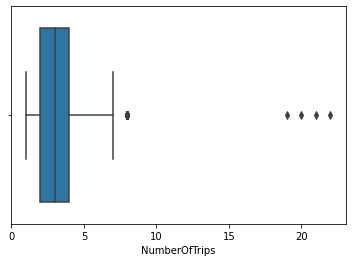

In [8]:
sns.boxplot(data['NumberOfTrips'])

#### columns than need their outliers handled:
* MonthlyIncome
* DurationOfPitch
* NumberOfFollowups
* NumberOfPersonVisiting
* NumberOfTrips

### Tukey's method:

In [58]:
def tukeys_method(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss

In [59]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "MonthlyIncome")
print(probable_outliers_tm,type(probable_outliers_tm))

[38, 142, 2482] <class 'list'>


In [68]:
data.iloc[probable_outliers_tm,:]

,Unnamed: 0,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,...,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
38,38,200038,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,...,Basic,5.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
142,142,200142,0,38.0,Self Enquiry,1,9.0,Large Business,Female,2,...,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0
2482,2482,202482,0,37.0,Self Enquiry,1,12.0,Salaried,Female,3,...,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0


In [101]:
l1 = [i for i in range(4888)]

In [104]:
l1.remove(142)

In [112]:
# l2 = [i for i in range(4888)]
l2.remove(3878)

In [27]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "DurationOfPitch")
print(probable_outliers_tm)

[1434, 3878]


In [30]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(data, "NumberOfTrips")
print(probable_outliers_tm)

[385, 816, 2829, 3260]


In [121]:
data_nooutliers.drop([1434, 3878,385, 816, 2829, 3260],inplace=True)

### Z score method:

In [10]:
num_data = data[[i for i in data.columns if data[i].dtype != 'O']]

In [20]:
num_skew = [num_data[i].skew() for i in num_data.columns]

In [24]:
num_skew_df = pd.DataFrame({
    'col':num_data.columns,
    'skewness':num_skew,
    'min':[num_data[i].min() for i in num_data.columns],
    'max':[num_data[i].max() for i in num_data.columns],
    'std_dev':[num_data[i].std() for i in num_data.columns],
    'upper limit':[num_data[i].mean() + 3*num_data[i].std() for i in num_data.columns],
    'lower limit':[num_data[i].mean() - 3*num_data[i].std() for i in num_data.columns]
})
num_skew_df

,col,skewness,min,max,std_dev,upper limit,lower limit
0,Unnamed: 0,0.000000,0.0,4887.0,1411.188388,6677.065164,-1790.065164
1,CustomerID,0.000000,200000.0,204887.0,1411.188388,206677.065164,198209.934836
2,ProdTaken,1.595763,0.0,1.0,0.390925,1.360990,-0.984558
3,Age,0.378462,18.0,61.0,9.306963,65.586600,9.744824
4,CityTier,0.736531,1.0,3.0,0.916583,4.404006,-1.095495
5,DurationOfPitch,1.715871,5.0,127.0,8.490123,40.929043,-10.011695
6,NumberOfPersonVisiting,0.029817,1.0,5.0,0.724891,5.079745,0.730402
7,NumberOfFollowups,-0.370246,1.0,6.0,1.000919,6.711022,0.705508
8,PreferredPropertyStar,0.899432,3.0,5.0,0.797613,5.972421,1.186744
9,NumberOfTrips,1.444199,1.0,22.0,1.842191,8.771049,-2.282096


In [26]:
num_data[(num_data['NumberOfFollowups'] < 6.7) | (num_data['NumberOfFollowups'] > 0.7)]

,Unnamed: 0,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,4,200004,0,32.0,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


But in this case z score method is less effective